In [30]:
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from funktionen import *
import seaborn as sns
sns.set(style="white") #"whitegrid"
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_excel('Chatbots_Est_pl.xlsx')

In [3]:
data.head()

,ID,Marca temporal,Consentimiento,Perfil,Medios,Interaccion,In_Retro,In_Acc,In_Rap,In_Pers,...,Op_7,Op_9,Op_2,Op_4,Op_1,Op_3,Campo,Edad,Genero,Comentarios
0,0,2024/12/17 11:42:52 a. m. CET,Quiero participar.,Estudiante (de grado),Correo electrónico;Plataforma de gestión del a...,Videoconferencias en tiempo real;Clases presen...,5,5,5,5,...,3,3,3,3,3,3,Historia y Artes,18,Femenino,NaN
1,2,2024/12/17 12:31:31 p. m. CET,Quiero participar.,Estudiante (de posgrado),Correo electrónico;Plataforma de gestión del a...,Mensajes en plataformas de aprendizaje;Correos...,2,2,4,4,...,3,3,5,5,2,5,"Ingenierías de la Comunicación, Computación y ...",23,Masculino,Debe implementarse pero ya la educación imple...
2,3,2024/12/17 1:04:06 p. m. CET,Quiero participar.,Estudiante (de posgrado),Correo electrónico;Plataforma de gestión del a...,Chats en tiempo real (mensajería instantánea);...,5,4,4,3,...,2,4,4,5,4,5,Ciencias de la actividad física y el deporte,44,Femenino,Considero que los Chatbots son el presente y f...
3,4,2024/12/17 1:41:21 p. m. CET,Quiero participar.,Estudiante (de grado),Correo electrónico;Plataforma de gestión del a...,Mensajes en plataformas de aprendizaje;Clases ...,5,4,4,5,...,1,5,1,1,1,1,"Filosofía, Filología y Lingüística",19,Femenino,NaN
4,5,2024/12/17 1:41:51 p. m. CET,Quiero participar.,Estudiante (de grado),Correo electrónico;Plataforma de gestión del a...,Clases presenciales en el aula,5,5,4,5,...,3,3,5,2,2,4,Ciencias del Comportamiento y de la Educación,20,Femenino,NaN


### Interacción con el profesorado

In [4]:
list_int = [col for col in data.columns if 'In_' in col]

In [67]:
df_describe1(data,list_int)

,count,mean,std,min,25%,50%,75%,max,median,kurtosis,skew
In_Retro,83.0,4.409639,0.749571,2.0,4.0,5.0,5.0,5.0,5.0,2.006929,-1.374514
In_Acc,83.0,4.120482,0.955058,1.0,4.0,4.0,5.0,5.0,4.0,0.840153,-1.107113
In_Rap,83.0,4.108434,0.732720,2.0,4.0,4.0,5.0,5.0,4.0,0.230191,-0.553586
In_Pers,83.0,4.084337,0.913380,2.0,4.0,4.0,5.0,5.0,4.0,-0.215095,-0.760241
In_Conf,83.0,4.590361,0.605587,3.0,4.0,5.0,5.0,5.0,5.0,0.440234,-1.200636
In_Mot,83.0,4.337349,0.845030,2.0,4.0,5.0,5.0,5.0,5.0,-0.189328,-0.961863
In_Ej,83.0,4.614458,0.621394,3.0,4.0,5.0,5.0,5.0,5.0,0.836003,-1.386477
In_Dud,83.0,4.409639,0.625400,2.0,4.0,4.0,5.0,5.0,4.0,1.297593,-0.874571
In_Flex,83.0,3.783133,0.856086,2.0,3.0,4.0,4.0,5.0,4.0,-0.507258,-0.279927
In_Emp,83.0,4.590361,0.605587,3.0,4.0,5.0,5.0,5.0,5.0,0.440234,-1.200636


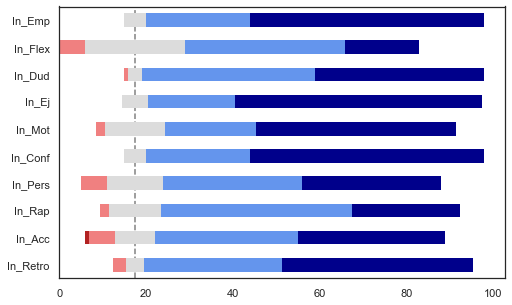

In [68]:
graf_likert(data[list_int],5)

In [69]:
data[list_int].corr()

,In_Retro,In_Acc,In_Rap,In_Pers,In_Conf,In_Mot,In_Ej,In_Dud,In_Flex,In_Emp
In_Retro,1.000000,0.390164,0.073568,0.233921,0.105520,0.356763,0.055203,0.392098,0.273161,0.374177
In_Acc,0.390164,1.000000,0.538761,0.072089,0.149629,0.432566,0.181970,0.324709,0.420151,0.444824
In_Rap,0.073568,0.538761,1.000000,0.004391,0.376159,0.215943,0.173292,0.327690,0.368452,0.321192
In_Pers,0.233921,0.072089,0.004391,1.000000,0.173458,0.326093,0.315827,0.237668,0.304407,0.129363
In_Conf,0.105520,0.149629,0.376159,0.173458,1.000000,0.082690,0.320559,0.384069,0.226444,0.135417
In_Mot,0.356763,0.432566,0.215943,0.326093,0.082690,1.000000,0.366836,0.173763,0.372087,0.559305
In_Ej,0.055203,0.181970,0.173292,0.315827,0.320559,0.366836,1.000000,0.223067,0.276476,0.352966
In_Dud,0.392098,0.324709,0.327690,0.237668,0.384069,0.173763,0.223067,1.000000,0.418507,0.319669
In_Flex,0.273161,0.420151,0.368452,0.304407,0.226444,0.372087,0.276476,0.418507,1.000000,0.414628
In_Emp,0.374177,0.444824,0.321192,0.129363,0.135417,0.559305,0.352966,0.319669,0.414628,1.000000


### Opiniones sobre chatbots

(1) Los chatbots proporcionan respuestas confiables y precisas a mis preguntas académicas.

(2) Los chatbots pueden ofrecer explicaciones claras y comprensibles sobre temas complejos.	

(3) Los chatbots me ayudan con mis tareas y proyectos.

(4) Los chatbots deben ser una parte integral de la experiencia educativa de un/a estudiante.	

(5) Los chatbots pueden ayudar a mejorar las habilidades de estudio y aprendizaje.	

(6) El uso de chatbots en el ámbito universitario es ético.	

(7) Los chatbots manejan correctamente los datos sensibles.	

(8) Los chatbots proporcionan información sesgada.

(9) Los chatbots tienen un problema de privacidad.	

(10) El uso de chatbots conduce a la dependencia tecnológica.	

(11) Los chatbots no respetan la privacidad de los usuarios.	

(12) El uso de chatbots conduce a una falta de pensamiento crítico.	


Instructions:

Lea y valore las siguientes afirmaciones sobre chatbots.

Estoy en desacuerdo = 1	
Más bien en desacuerdo = 2	
Ni estoy de acuerdo ni en desacuerdo = 3	
Más bien de acuerdo = 4	
Completamente de acuerdo = 5

(Numerical values were assigned to the Likert values for the analysis.)

In [5]:
list_op = [col for col in data.columns if 'Op_' in col]

#### Description

In [6]:
df_describe1(data,list_op)

,count,mean,std,min,25%,50%,75%,max,median,kurtosis,skew
Op_8,83.0,3.301205,1.020939,1.0,3.0,3.0,4.0,5.0,3.0,-0.029511,-0.287704
Op_5,83.0,3.915663,1.139157,1.0,3.5,4.0,5.0,5.0,4.0,0.351353,-1.048445
Op_12,83.0,3.397590,1.178463,1.0,3.0,4.0,4.0,5.0,4.0,-0.682024,-0.366871
Op_10,83.0,3.759036,1.110816,1.0,3.0,4.0,5.0,5.0,4.0,0.579373,-0.927166
Op_11,83.0,3.132530,0.934059,1.0,3.0,3.0,4.0,5.0,3.0,0.439014,0.097560
Op_6,83.0,3.734940,1.048627,1.0,3.0,4.0,4.0,5.0,4.0,0.489280,-0.875146
Op_7,83.0,2.614458,0.973193,1.0,2.0,3.0,3.0,5.0,3.0,0.030294,0.035023
Op_9,83.0,3.361446,0.918354,1.0,3.0,3.0,4.0,5.0,3.0,0.078630,0.082149
Op_2,83.0,3.855422,1.159610,1.0,3.5,4.0,5.0,5.0,4.0,0.354440,-1.057219
Op_4,83.0,3.253012,1.167062,1.0,3.0,3.0,4.0,5.0,3.0,-0.471628,-0.370416


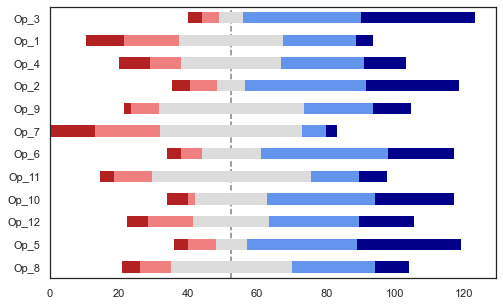

In [7]:
graf_likert(data[list_op],5)

In [8]:
CronbachAlpha(data[list_op])

0.7114449162197423

#### Correlation

In [9]:
data[list_op].corr()

,Op_8,Op_5,Op_12,Op_10,Op_11,Op_6,Op_7,Op_9,Op_2,Op_4,Op_1,Op_3
Op_8,1.000000,0.116481,0.031019,0.021766,0.264548,0.234959,0.044660,0.233656,0.057834,0.160432,0.076733,0.329261
Op_5,0.116481,1.000000,-0.038307,-0.074080,-0.161285,0.491506,0.289320,-0.098735,0.692280,0.511585,0.352240,0.657005
Op_12,0.031019,-0.038307,1.000000,0.521246,0.106651,-0.219603,0.114021,0.136035,0.015805,-0.144970,-0.095545,-0.091815
Op_10,0.021766,-0.074080,0.521246,1.000000,0.289733,-0.212542,-0.188514,0.337465,0.029429,-0.178166,-0.135789,-0.010524
Op_11,0.264548,-0.161285,0.106651,0.289733,1.000000,0.135907,-0.251665,0.682749,-0.094684,-0.087071,-0.142436,-0.078875
Op_6,0.234959,0.491506,-0.219603,-0.212542,0.135907,1.000000,0.209340,0.189343,0.519690,0.493921,0.306297,0.603154
Op_7,0.044660,0.289320,0.114021,-0.188514,-0.251665,0.209340,1.000000,-0.196950,0.349836,0.290941,0.479026,0.377260
Op_9,0.233656,-0.098735,0.136035,0.337465,0.682749,0.189343,-0.196950,1.000000,0.026766,-0.040853,-0.053640,0.019094
Op_2,0.057834,0.692280,0.015805,0.029429,-0.094684,0.519690,0.349836,0.026766,1.000000,0.459894,0.494079,0.657490
Op_4,0.160432,0.511585,-0.144970,-0.178166,-0.087071,0.493921,0.290941,-0.040853,0.459894,1.000000,0.328344,0.483243


#### Factor analysis

In [10]:
X = StandardScaler().fit_transform(data[list_op])
feature_names = data[list_op]

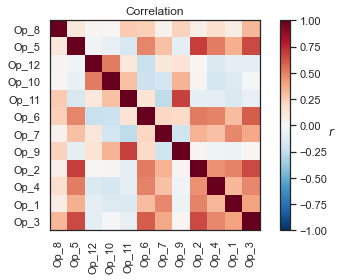

In [62]:
ax = plt.axes()

im = ax.imshow(np.corrcoef(X.T), cmap="RdBu_r", vmin=-1, vmax=1)

ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax.set_xticklabels(list(feature_names), rotation=90)
ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax.set_yticklabels(list(feature_names))

plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Correlation")
plt.tight_layout()



 PCA :

[[-0.12110213 -0.30954291  0.19933317]
 [-0.40393395 -0.02464262 -0.10627536]
 [ 0.08814356 -0.23867359 -0.64379449]
 [ 0.12019994 -0.3947367  -0.48202151]
 [ 0.09635589 -0.54196245  0.22306306]
 [-0.36498852 -0.1742591   0.28901451]
 [-0.27944528  0.15064963 -0.29125998]
 [ 0.04467435 -0.56208991  0.14696867]
 [-0.40903508 -0.09288019 -0.18891436]
 [-0.35755111 -0.01172498  0.10404715]
 [-0.32180594  0.05800684 -0.12274898]
 [-0.42267745 -0.1262334  -0.0292458 ]]


 Unrotated FA :

[[-0.20037308 -0.30832945 -0.14596267]
 [-0.78714684  0.00390272  0.14204487]
 [ 0.15221301 -0.26868214  0.56865772]
 [ 0.18835661 -0.52448195  0.60324547]
 [ 0.17346777 -0.78355456 -0.24404284]
 [-0.70194377 -0.23203436 -0.32795127]
 [-0.44963186  0.19733673  0.1221332 ]
 [ 0.06924019 -0.80093736 -0.15418235]
 [-0.80049894 -0.11497202  0.20652987]
 [-0.62916922  0.00667519 -0.10435656]
 [-0.53240351  0.06365711  0.03667833]
 [-0.81657078 -0.1266478   0.06647916]]


 Varimax FA :

[[-0.22529464 -0

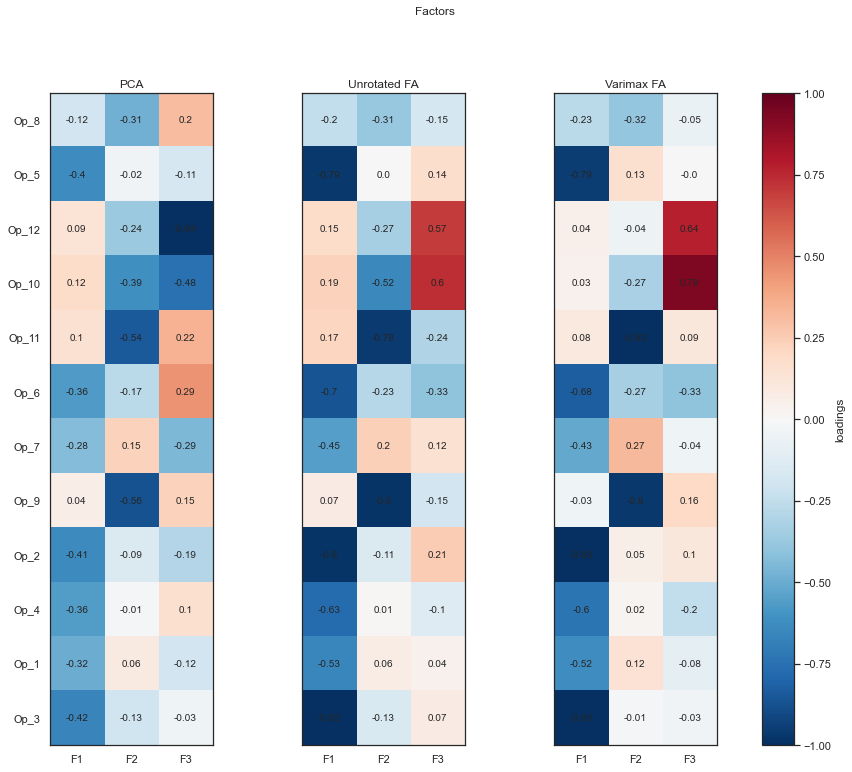

In [45]:
n_comps = 3

methods = [
    ("PCA", PCA()),
    ("Unrotated FA", FactorAnalysis()),
    ("Varimax FA", FactorAnalysis(rotation="varimax")),
]
fig, axes = plt.subplots(ncols=len(methods), figsize=(16, 12), sharey=True)

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(X)

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    for (i,j), z in np.ndenumerate(components):
        ax.text(j, i, str(z.round(2)), ha="center", va="center")
    #ax.set_yticks(np.arange(len(feature_names)))
    ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
    ax.set_yticklabels(feature_names)
    ax.set_title(str(method))
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["F1", "F2", "F3"])
fig.suptitle("Factors")

cb = fig.colorbar(im, ax=axes, location='right', label="loadings")

#plt.tight_layout()
plt.show()

Interpretación:

F1: Utilidad de los chatbots para el usuario

F2: Seguridad de los chatbots

F3: Dependencia tecnológica

<AxesSubplot:ylabel='Uniqueness'>

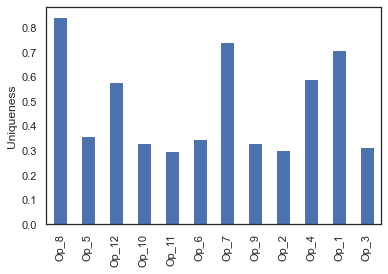

In [52]:
fa = FactorAnalysis(n_components = 3, rotation="varimax")
fa.fit(X)
uniqueness = Series(fa.noise_variance_, index=list_op)
uniqueness.plot(
    kind="bar",
    ylabel="Uniqueness"
)

<AxesSubplot:ylabel='communality'>

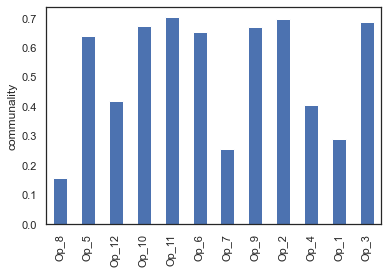

In [53]:
communality = Series(np.square(fa.components_.T).sum(axis=1), index=list_op)
communality.plot(
    kind="bar",
    ylabel="communality"
)

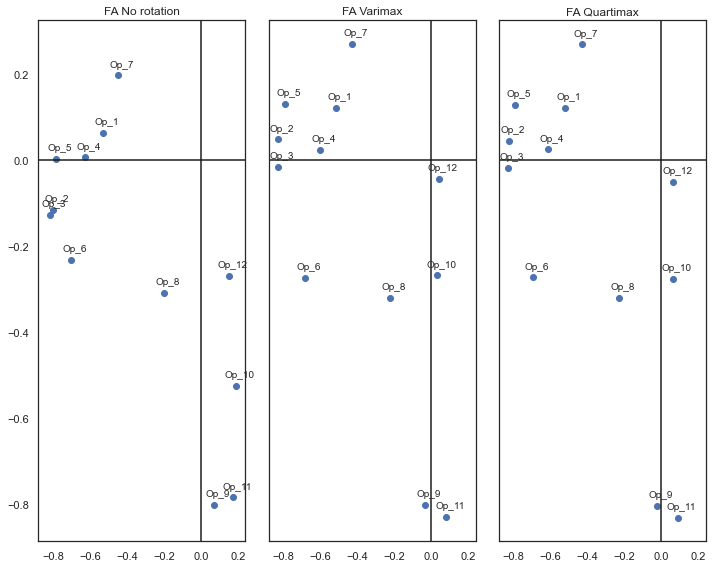

In [66]:
methods = [
    ("FA No rotation", FactorAnalysis(3,)),
    ("FA Varimax", FactorAnalysis(3, rotation="varimax")),
    ("FA Quartimax", FactorAnalysis(3, rotation="quartimax")),
]
fig, axes = plt.subplots(ncols=3, figsize=(10, 8), sharex=True, sharey=True)

for ax, (method, fa) in zip(axes, methods):
    fa = fa.fit(X)

    components = fa.components_

    vmax = np.abs(components).max()
    ax.scatter(components[0,:], components[1, :])
    ax.axhline(0, -1, 1, color='k')
    ax.axvline(0, -1, 1, color='k')
    for i,j, z in zip(components[0, :], components[1, :], list_op):
        ax.text(i+.02, j+.02, str(z), ha="center")
    ax.set_title(str(method))
    #if ax.get_subplotspec().is_first_col():
     #   ax.set_ylabel("Factor 1")
   # ax.set_xlabel("Factor 2")

plt.tight_layout()
plt.show()

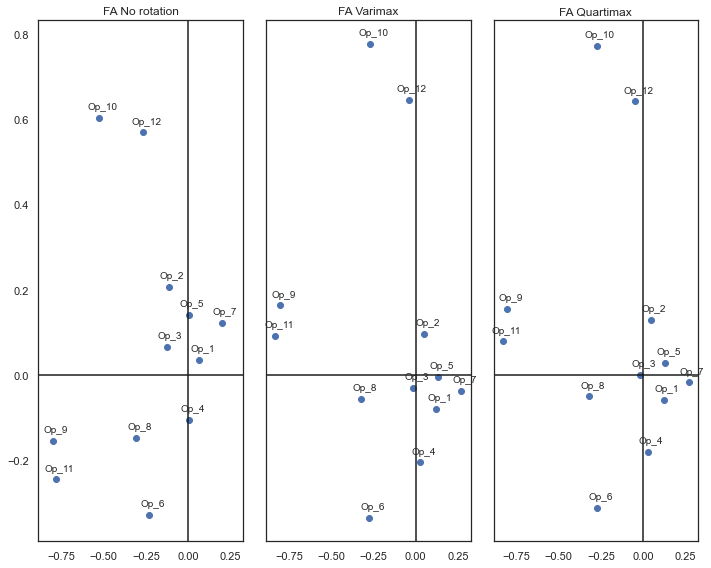

In [65]:
methods = [
    ("FA No rotation", FactorAnalysis(3,)),
    ("FA Varimax", FactorAnalysis(3, rotation="varimax")),
    ("FA Quartimax", FactorAnalysis(3, rotation="quartimax")),
]
fig, axes = plt.subplots(ncols=3, figsize=(10, 8), sharex=True, sharey=True)

for ax, (method, fa) in zip(axes, methods):
    fa = fa.fit(X)

    components = fa.components_

    vmax = np.abs(components).max()
    ax.scatter(components[1,:], components[2, :])
    ax.axhline(0, -1, 1, color='k')
    ax.axvline(0, -1, 1, color='k')
    for i,j, z in zip(components[1, :], components[2, :], list_op):
        ax.text(i+.02, j+.02, str(z), ha="center")
    ax.set_title(str(method))
    #if ax.get_subplotspec().is_first_col():
     #   ax.set_ylabel("Factor 1")
   # ax.set_xlabel("Factor 2")

plt.tight_layout()
plt.show()